In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
Ev=pd.read_csv(r"C:\Users\pagad\Downloads\Electric_Vehicle_Population_Data.csv")
Ev.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,JHMZC5F37M,Kitsap,Poulsbo,WA,98370.0,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,0,23.0,171566447,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
2,5YJ3E1EB0K,King,Seattle,WA,98199.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,36.0,9426525,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,1N4AZ0CP5D,King,Seattle,WA,98119.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,36.0,211807760,POINT (-122.3684 47.64586),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1E21H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,185810306,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10


<b>1.Get all the cars and their types that do not qualify for clean alternative fuel vehicle<b>

In [3]:
# Get all the cars and their types that do not qualify for clean alternative fuel vehicles
non_clean_cars =Ev.loc[Ev["Clean Alternative Fuel Vehicle (CAFV) Eligibility"] == "Not eligible due to low battery range", ["Make", "Model"]]

# Display the result
print("Cars and their types that do not qualify for clean alternative fuel vehicles:")
print(non_clean_cars)

Cars and their types that do not qualify for clean alternative fuel vehicles:
          Make        Model
6         FORD       FUSION
7         AUDI         Q5 E
8         FORD        C-MAX
14        FORD        C-MAX
15         KIA         NIRO
...        ...          ...
130377     BMW         530E
130385    AUDI           A3
130390    JEEP     WRANGLER
130407  TOYOTA  PRIUS PRIME
130437     BMW         530E

[16446 rows x 2 columns]


<function matplotlib.pyplot.show(close=None, block=None)>

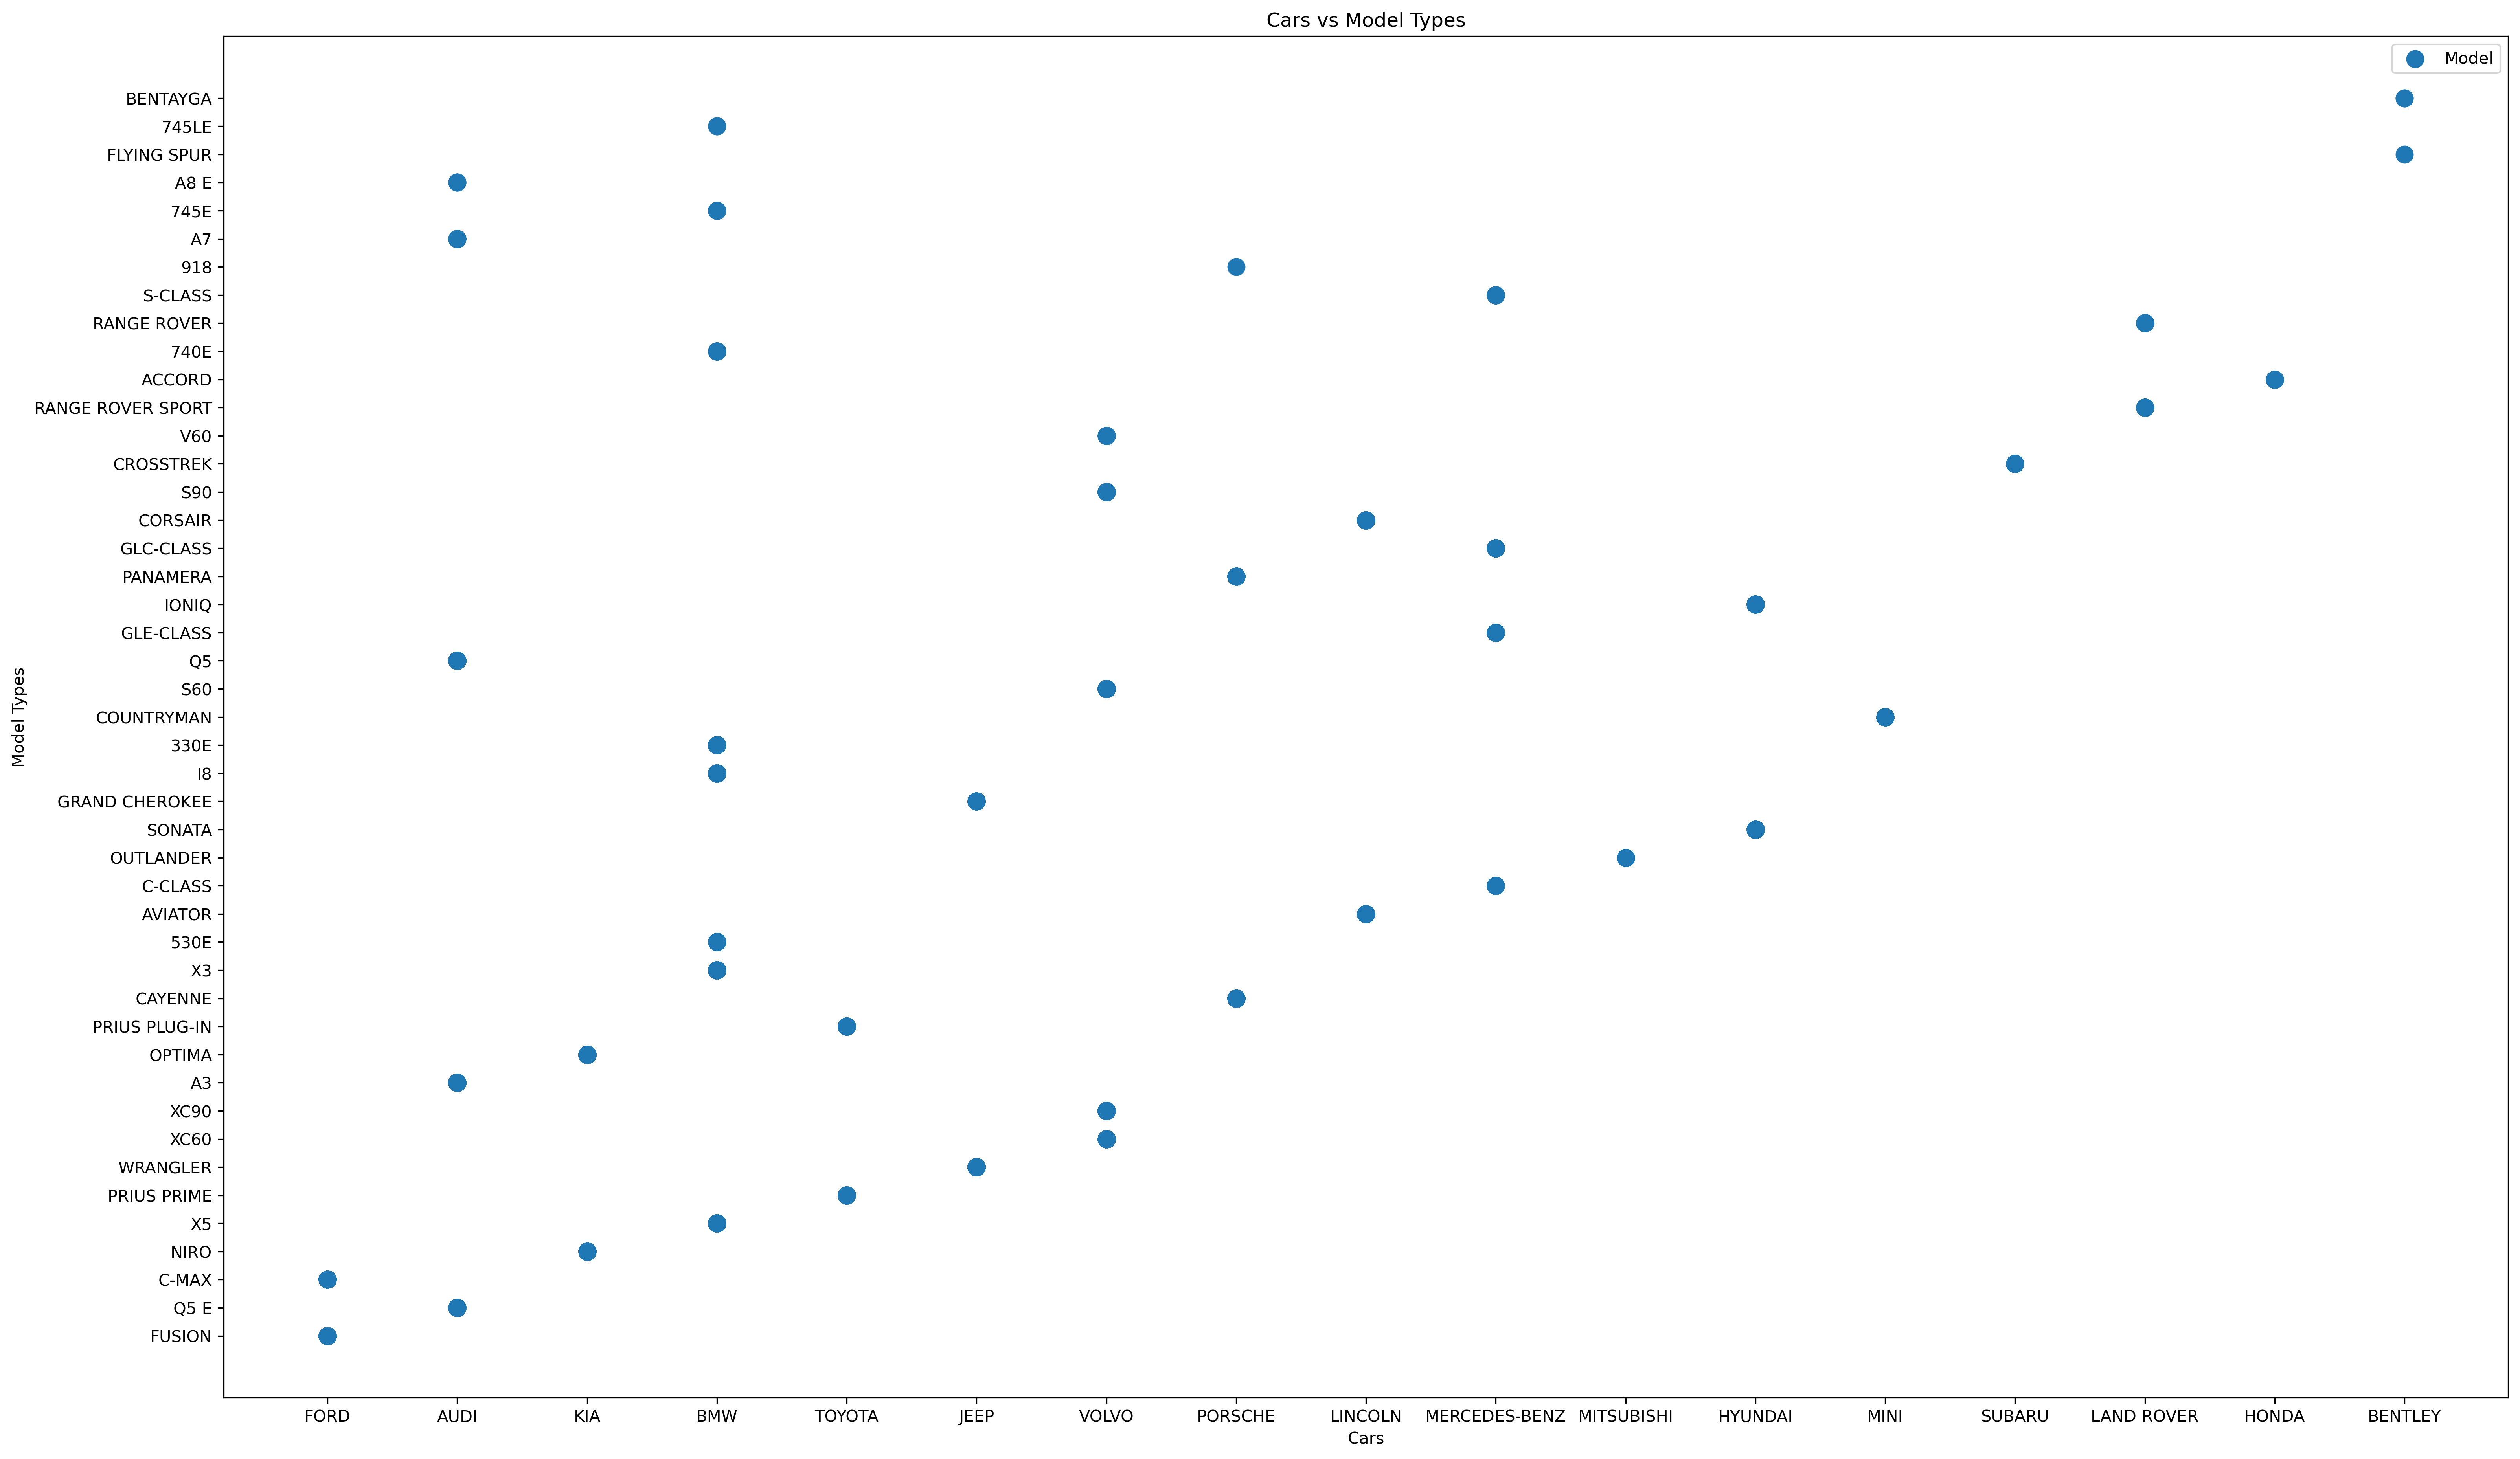

In [4]:
#plot to cars vs model types using scatter plot
fig=plt.figure(figsize=(25,15),dpi=300)
plt.scatter(data=non_clean_cars,x='Make',y='Model',s=100) #scatter plot visualization
plt.title("Cars vs Model Types")
plt.xlabel('Cars')
plt.ylabel("Model Types")
plt.legend()
plt.show

<b> 2. Get all TESLA cars with the model year, and model type made in Bothell City. <b>

In [5]:
#Get all TESLA cars with the model year, and model type made in Bothell City.
tesla_cars=Ev.loc[(Ev['Make']=='TESLA') & (Ev["City"]=='Bothell'),['Model Year','Model']]
print(tesla_cars)

        Model Year    Model
39            2020  MODEL 3
217           2022  MODEL 3
218           2022  MODEL Y
222           2018  MODEL 3
292           2017  MODEL X
...            ...      ...
129778        2019  MODEL 3
129954        2021  MODEL 3
129976        2014  MODEL S
130295        2022  MODEL 3
130392        2018  MODEL 3

[2407 rows x 2 columns]


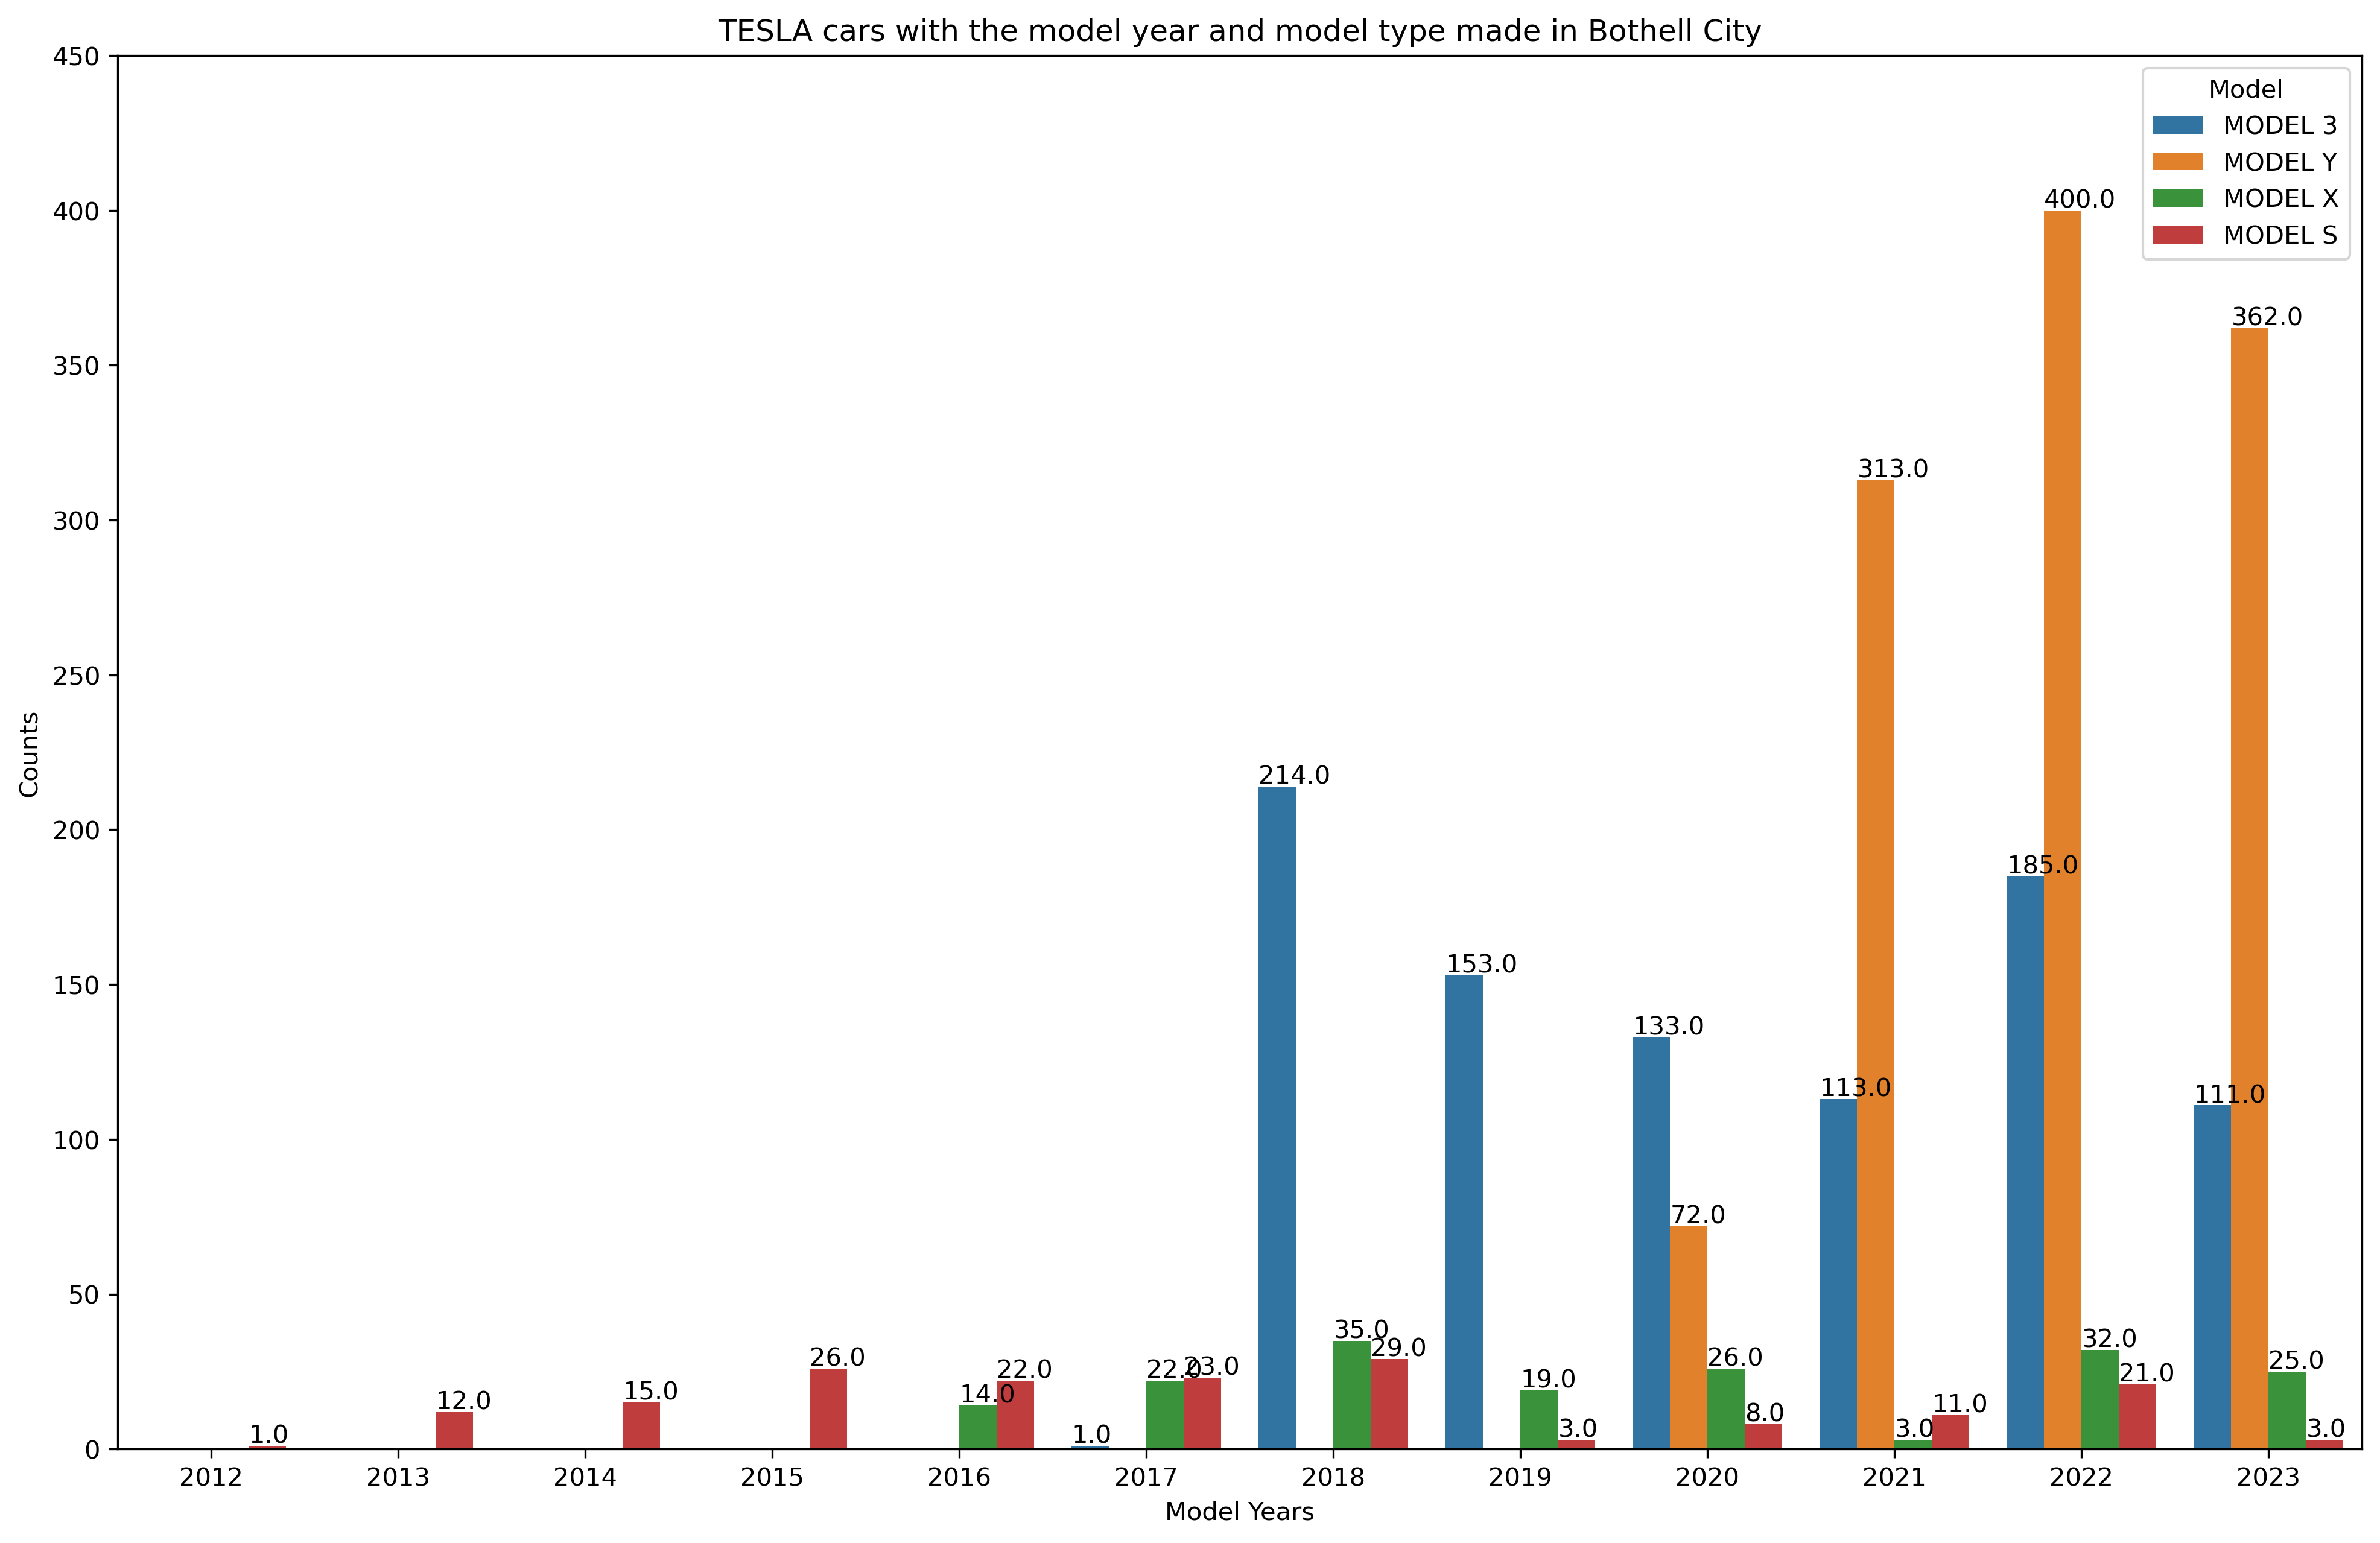

In [6]:
#Plot to cars mode year and model types using countplot
plt.figure(figsize=(16,10),dpi=300)
ax=sns.countplot(data=tesla_cars,x="Model Year",hue="Model") #countplot
plt.title("TESLA cars with the model year and model type made in Bothell City") #title name
plt.xlabel("Model Years")
plt.ylabel("Counts")
plt.ylim(0,450)
for i in ax.patches:
    ax.annotate('{:.1f}'.format(i.get_height()),(i.get_x(),i.get_height()+1))
plt.show()

<b> 3. Get all the cars that have an electric range of more than 100, and were made after 2015 <b>

In [7]:
#Get all the cars that have an electric range of more than 100, and were made after 2015
filtered_cars=Ev.loc[(Ev['Electric Range']>100) & (Ev['Model Year']>2015),:]['Make']

In [8]:
filtered_cars

0          TESLA
2          TESLA
4          TESLA
12         TESLA
13         TESLA
           ...  
130417     TESLA
130428    NISSAN
130432     TESLA
130436     TESLA
130441     TESLA
Name: Make, Length: 34066, dtype: object

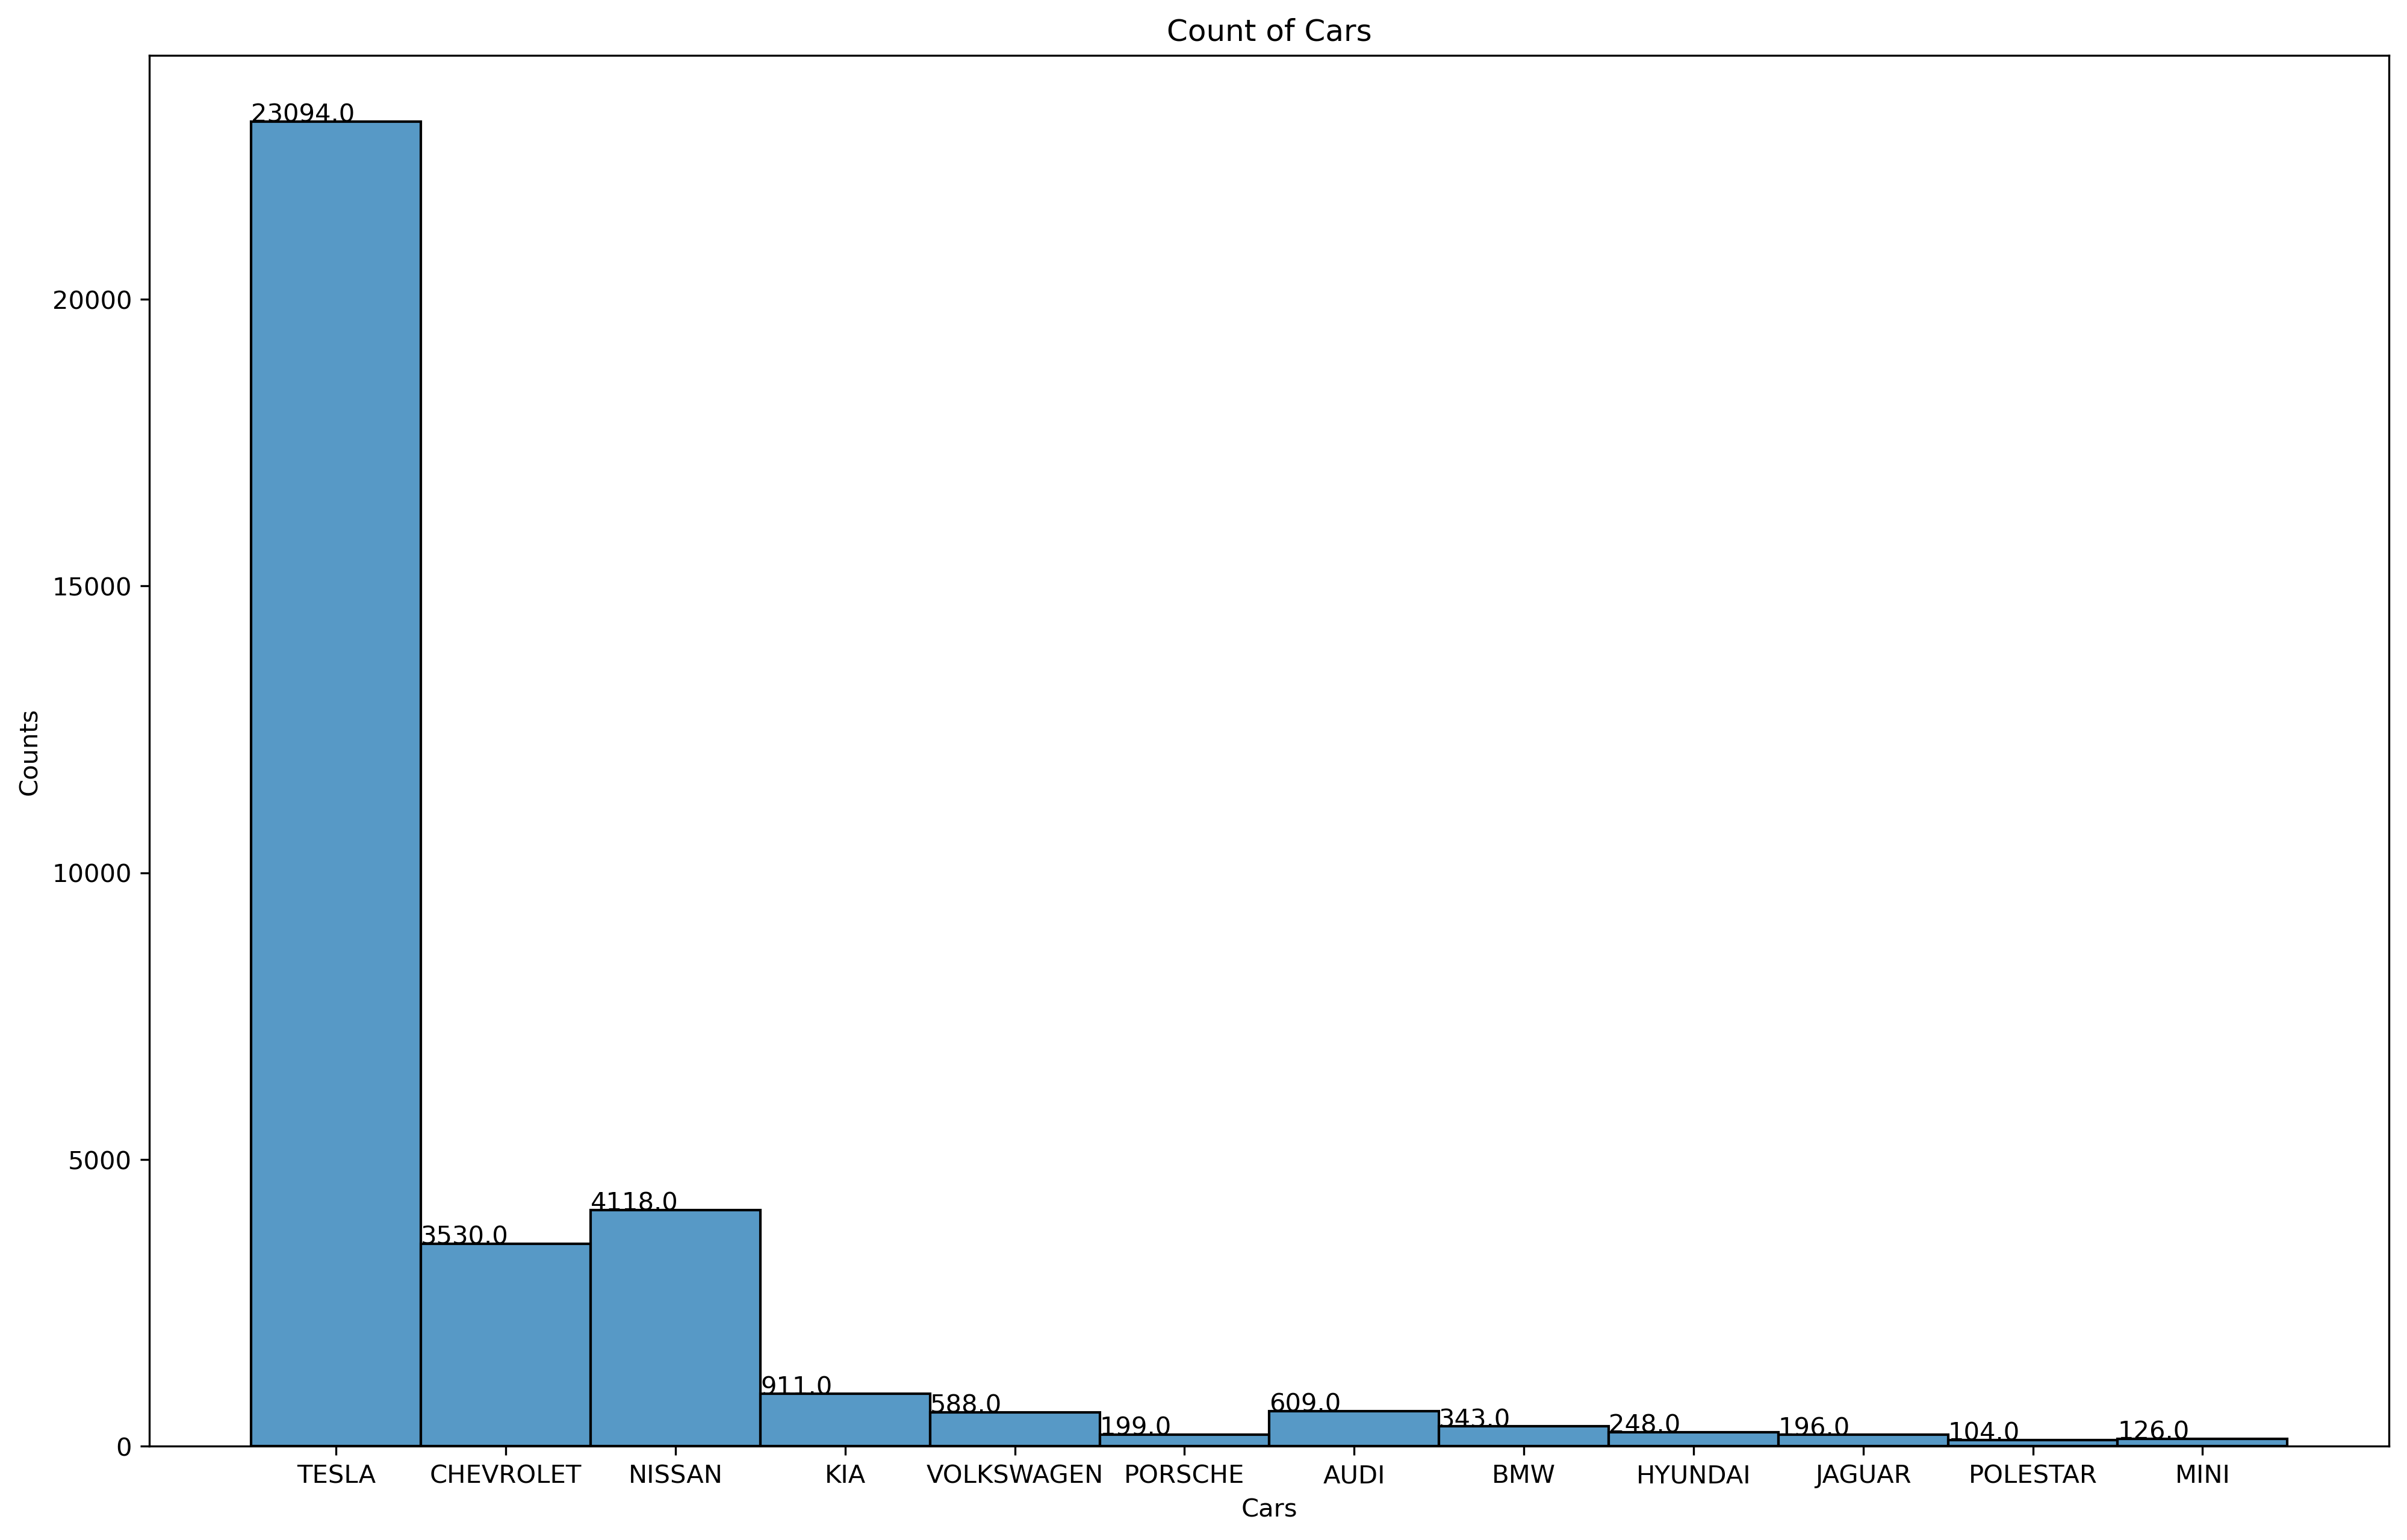

In [9]:
# Plot to counting the cars for using a hist plot
plt.figure(figsize=(16,10),dpi=300)
ax=sns.histplot(data=filtered_cars)
plt.title("Count of Cars")
plt.xlabel("Cars")
plt.ylabel("Counts")
for i in ax.patches:
    ax.annotate('{:.1f}'.format(i.get_height()),(i.get_x(),i.get_height()+1))
plt.show()

<b> 4.Draw plots to show the distribution between city and electric vehicle type <b>

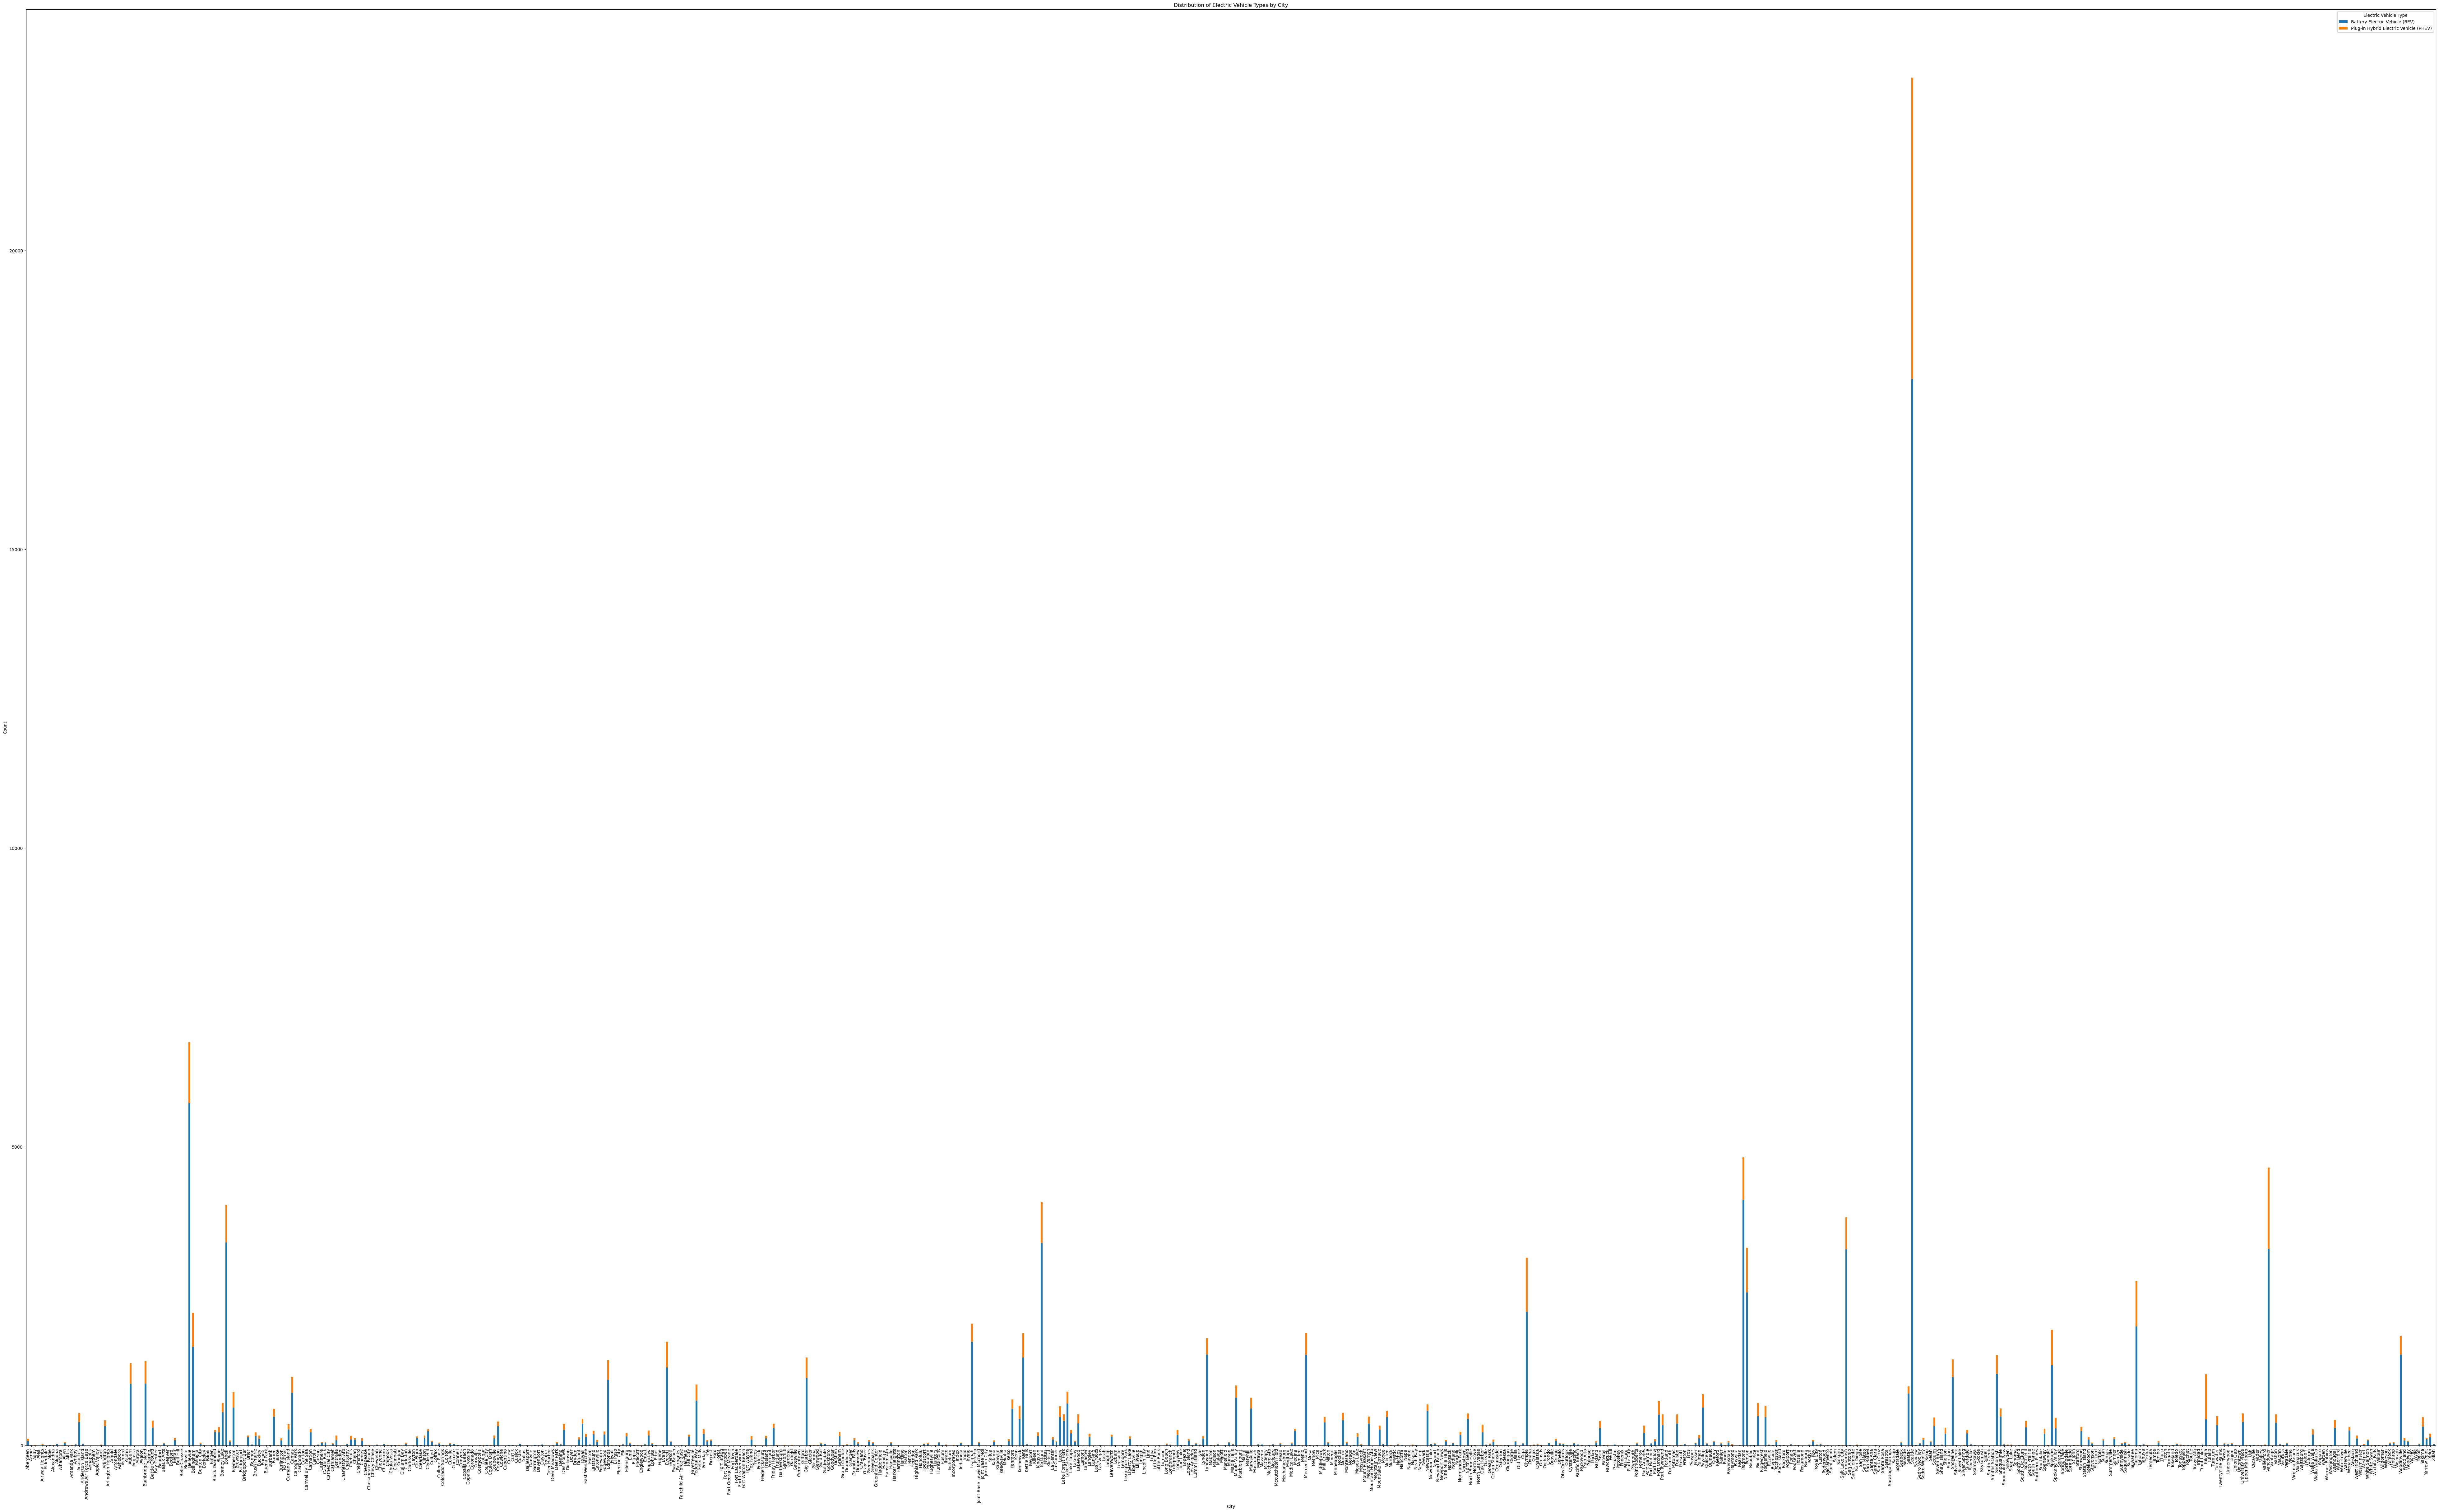

In [11]:
# Group the data by city and electric vehicle type and count the occurrences
grouped_data = Ev.groupby(["City", "Electric Vehicle Type"]).size().reset_index(name="Count")

# Pivot the data to reshape it for plotting
pivoted_data = grouped_data.pivot(index="City", columns="Electric Vehicle Type", values="Count")

# Plot the distribution using a bar plot
pivoted_data.plot(kind="bar", stacked=True, figsize=(100, 60))
plt.xlabel("City")
plt.ylabel("Count")
plt.title("Distribution of Electric Vehicle Types by City")
plt.legend(title="Electric Vehicle Type")
plt.show()